# Visualisation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file = '/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/tests/results.txt'
df = pd.read_csv(file, sep=' ', header=None)
df.columns = ['test', 'kappa', 'time']
df[['mission', 'world', 'col1', 'col2', 'col3']] = df.test.str.split("-", expand=True)
df['col1'] = df['col1'].astype(float)
df['col2'] = df['col2'].astype(float)
df['col3'] = df['col3'].astype(float)
df.loc[df['mission'] == 'investigation_polygonale', 'n_points'] = df['col1']
df.loc[df['mission'] == 'investigation_polygonale', 'n_crawlers'] = df['col2']
df.loc[df['mission'] == 'investigation_polygonale', 'distance'] = df['col3']
df.loc[df['mission'] == 'ski_nordique', 'stride'] = df['col2']
df.loc[df['mission'] == 'ski_nordique', 'distance'] = df['col1']
df.loc[df['mission'] == 'peinture_au_rouleau', 'distance'] = df['col1']
df = df.drop(columns=['test', 'col1', 'col2', 'col3'])
df = df[['mission', 'world', 'distance', 'stride', 'n_points', 'n_crawlers', 'kappa', 'time']]
df.loc[df['world'] == 'test_model_05_1', 'world'] = 'test_model_05'
df.loc[df['world'] == 'test_model_05_2', 'world'] = 'test_model_05'
df.loc[df['world'] == 'test_model_05_3', 'world'] = 'test_model_05'
df.loc[df['world'] == 'test_model_05_4', 'world'] = 'test_model_05'
df.loc[df['world'] == 'test_model_05_5', 'world'] = 'test_model_05'
df.loc[df['world'] == 'test_model_08_1', 'world'] = 'test_model_08'
df.loc[df['world'] == 'test_model_08_2', 'world'] = 'test_model_08'
df.loc[df['world'] == 'test_model_08_3', 'world'] = 'test_model_08'
df.loc[df['world'] == 'test_model_08_4', 'world'] = 'test_model_08'
df.loc[df['world'] == 'test_model_08_5', 'world'] = 'test_model_08'
df.loc[df['world'] == 'test_model_11_1', 'world'] = 'test_model_11'
df.loc[df['world'] == 'test_model_11_2', 'world'] = 'test_model_11'
df.loc[df['world'] == 'test_model_11_3', 'world'] = 'test_model_11'
df.loc[df['world'] == 'test_model_11_4', 'world'] = 'test_model_11'
df.loc[df['world'] == 'test_model_11_5', 'world'] = 'test_model_11'
df.loc[df['world'] == 'test_model_15_1', 'world'] = 'test_model_15'
df.loc[df['world'] == 'test_model_15_2', 'world'] = 'test_model_15'
df.loc[df['world'] == 'test_model_15_3', 'world'] = 'test_model_15'
df.loc[df['world'] == 'test_model_15_4', 'world'] = 'test_model_15'
df.loc[df['world'] == 'test_model_15_5', 'world'] = 'test_model_15'
df.loc[df['world'] == 'test_model_20_1', 'world'] = 'test_model_20'
df.loc[df['world'] == 'test_model_30_1', 'world'] = 'test_model_30'
df.loc[df['world'] == 'test_model_11_complex_1', 'world'] = 'test_model_11_complex'
df.loc[df['world'] == 'test_model_15_complex_1', 'world'] = 'test_model_15_complex'
df

,mission,world,distance,stride,n_points,n_crawlers,kappa,time
0,peinture_au_rouleau,test_model_05,6.0,NaN,NaN,NaN,0.17,218.25
1,peinture_au_rouleau,test_model_05,3.0,NaN,NaN,NaN,0.29,252.20
2,peinture_au_rouleau,test_model_05,2.0,NaN,NaN,NaN,0.48,339.83
3,peinture_au_rouleau,test_model_05,1.0,NaN,NaN,NaN,0.62,553.13
4,peinture_au_rouleau,test_model_05,6.0,NaN,NaN,NaN,0.23,215.04
...,...,...,...,...,...,...,...,...
490,investigation_polygonale,test_model_11,2.0,NaN,4.0,2.0,0.76,1382.92
491,investigation_polygonale,test_model_11,1.0,NaN,4.0,2.0,0.78,1051.36
492,investigation_polygonale,test_model_15,3.0,NaN,4.0,2.0,0.79,2150.23
493,investigation_polygonale,test_model_15,2.0,NaN,4.0,2.0,0.79,1797.69


## Peinture au rouleau

In [2]:
df_par = df.loc[df['mission'] == 'peinture_au_rouleau']
df_par_1 = df_par.loc[df_par['distance'] == 1]
df_par_2 = df_par.loc[df_par['distance'] == 2]
df_par_3 = df_par.loc[df_par['distance'] == 3]
df_par_6 = df_par.loc[df_par['distance'] == 6]
df_par

,mission,world,distance,stride,n_points,n_crawlers,kappa,time
0,peinture_au_rouleau,test_model_05,6.0,NaN,NaN,NaN,0.17,218.25
1,peinture_au_rouleau,test_model_05,3.0,NaN,NaN,NaN,0.29,252.20
2,peinture_au_rouleau,test_model_05,2.0,NaN,NaN,NaN,0.48,339.83
3,peinture_au_rouleau,test_model_05,1.0,NaN,NaN,NaN,0.62,553.13
4,peinture_au_rouleau,test_model_05,6.0,NaN,NaN,NaN,0.23,215.04
...,...,...,...,...,...,...,...,...
91,peinture_au_rouleau,test_model_11_complex,1.0,NaN,NaN,NaN,0.73,552.12
92,peinture_au_rouleau,test_model_15_complex,6.0,NaN,NaN,NaN,0.09,216.31
93,peinture_au_rouleau,test_model_15_complex,3.0,NaN,NaN,NaN,0.25,253.32
94,peinture_au_rouleau,test_model_15_complex,2.0,NaN,NaN,NaN,0.51,340.06


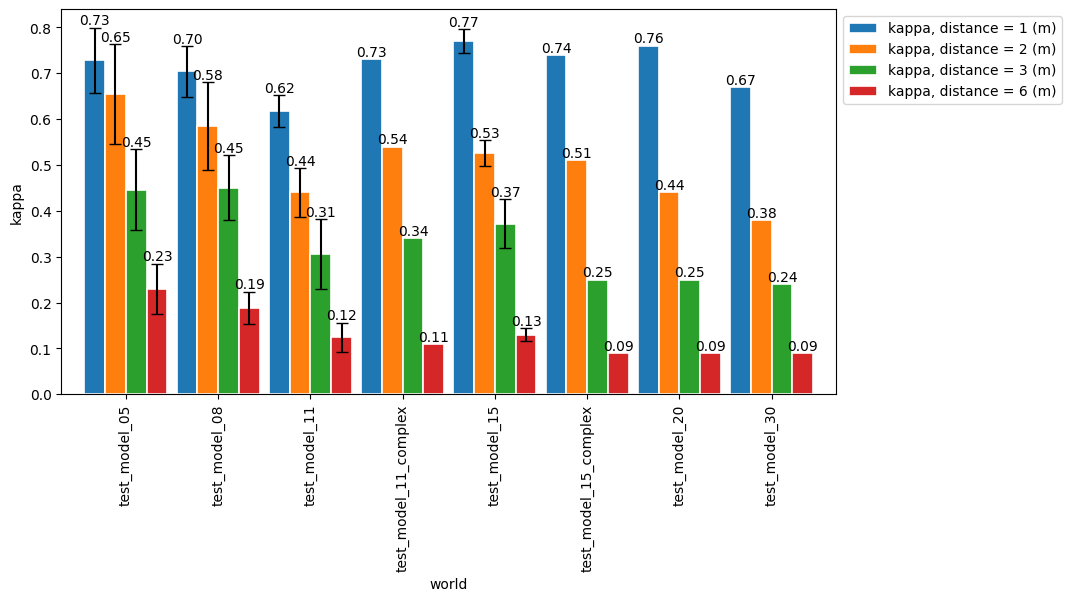

In [3]:
# kappa vs world for each d
ax = df_par.groupby(['distance', 'world'])[["kappa"]].mean().unstack('distance').plot(kind='bar', figsize=(10, 5), yerr=df_par.groupby(['distance', 'world'])[["kappa"]].std().unstack('distance'), capsize=4, width=0.9, edgecolor='white', linewidth=1.2)
for container in ax.containers[1::2]:
	ax.bar_label(container, fmt='%.2f', label_type='edge')
	ax.legend(['kappa, distance = 1 (m)', 'kappa, distance = 2 (m)', 'kappa, distance = 3 (m)', 'kappa, distance = 6 (m)'], loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.xlabel('world')
plt.ylabel('kappa')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/peinture_au_rouleau-kappa_vs_world_for_each_d.png', bbox_inches='tight')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/End-of-Study-Project-INSA-Lyon/graphics/peinture_au_rouleau-kappa_vs_world_for_each_d.png', bbox_inches='tight')
plt.show()

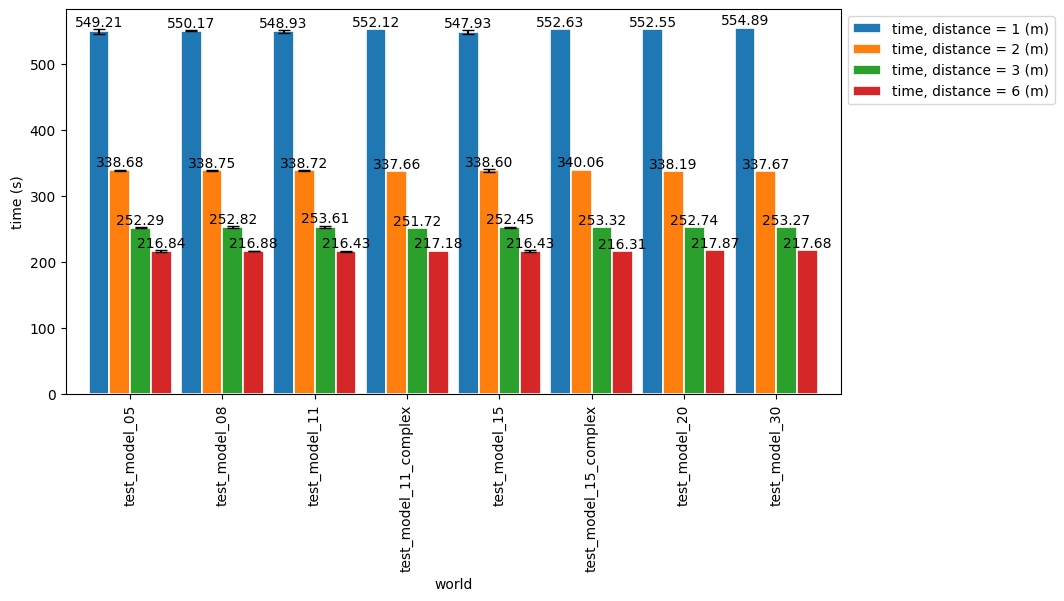

In [4]:
# time vs world for each d
ax = df_par.groupby(['distance', 'world'])[["time"]].mean().unstack('distance').plot(kind='bar', figsize=(10, 5), yerr=df_par.groupby(['distance', 'world'])[["time"]].std().unstack('distance'), capsize=4, width=0.9, edgecolor='white', linewidth=1.2)
for container in ax.containers[1::2]:
	ax.bar_label(container, fmt='%.2f', label_type='edge')
	ax.legend(['time, distance = 1 (m)', 'time, distance = 2 (m)', 'time, distance = 3 (m)', 'time, distance = 6 (m)'], loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.xlabel('world')
plt.ylabel('time (s)')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/peinture_au_rouleau-time_vs_world_for_each_d.png', bbox_inches='tight')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/End-of-Study-Project-INSA-Lyon/graphics/peinture_au_rouleau-time_vs_world_for_each_d.png', bbox_inches='tight')
plt.show()

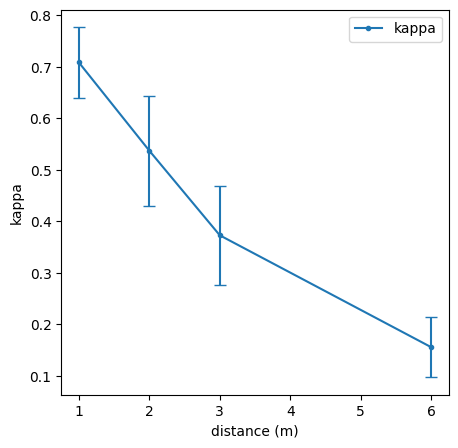

In [5]:
# kappa vs distance
df_par.groupby(['distance'])[["kappa"]].mean().plot(kind='line', marker='.', figsize=(5, 5), yerr=df_par.groupby(['distance'])[["kappa"]].std(), capsize=4)
plt.xlabel('distance (m)')
plt.ylabel('kappa')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/peinture_au_rouleau-kappa_vs_distance.png', bbox_inches='tight')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/End-of-Study-Project-INSA-Lyon/graphics/peinture_au_rouleau-kappa_vs_distance.png', bbox_inches='tight')
plt.show()

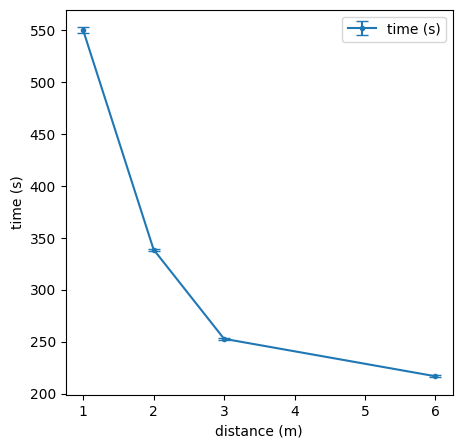

In [6]:
# time vs distance
ax = df_par.groupby(['distance'])[["time"]].mean().plot(kind='line', marker='.', figsize=(5, 5), yerr=df_par.groupby(['distance'])[["time"]].std(), capsize=4)
ax.legend(['time (s)'])
plt.xlabel('distance (m)')
plt.ylabel('time (s)')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/peinture_au_rouleau-time_vs_distance.png', bbox_inches='tight')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/End-of-Study-Project-INSA-Lyon/graphics/peinture_au_rouleau-time_vs_distance.png', bbox_inches='tight')
plt.show()

## Ski nordique

In [7]:
df_sn = df.loc[df['mission'] == 'ski_nordique']
df_sn_d1 = df_sn.loc[df_sn['distance'] == 1]
df_sn_d2 = df_sn.loc[df_sn['distance'] == 2]
df_sn_d3 = df_sn.loc[df_sn['distance'] == 3]
df_sn_d6 = df_sn.loc[df_sn['distance'] == 6]
df_sn_s1 = df_sn.loc[df_sn['stride'] == 1]
df_sn_s2 = df_sn.loc[df_sn['stride'] == 2]
df_sn_s3 = df_sn.loc[df_sn['stride'] == 3]
df_sn_s6 = df_sn.loc[df_sn['stride'] == 6]
df_sn

,mission,world,distance,stride,n_points,n_crawlers,kappa,time
96,ski_nordique,test_model_05,6.0,1.0,NaN,NaN,0.32,447.06
97,ski_nordique,test_model_05,6.0,2.0,NaN,NaN,0.38,491.01
98,ski_nordique,test_model_05,6.0,3.0,NaN,NaN,0.59,543.42
99,ski_nordique,test_model_05,6.0,6.0,NaN,NaN,0.55,701.10
100,ski_nordique,test_model_05,3.0,1.0,NaN,NaN,0.48,768.98
...,...,...,...,...,...,...,...,...
475,ski_nordique,test_model_15_complex,2.0,6.0,NaN,NaN,0.49,1965.49
476,ski_nordique,test_model_15_complex,1.0,1.0,NaN,NaN,0.84,2133.30
477,ski_nordique,test_model_15_complex,1.0,2.0,NaN,NaN,0.79,2437.45
478,ski_nordique,test_model_15_complex,1.0,3.0,NaN,NaN,0.73,2805.68


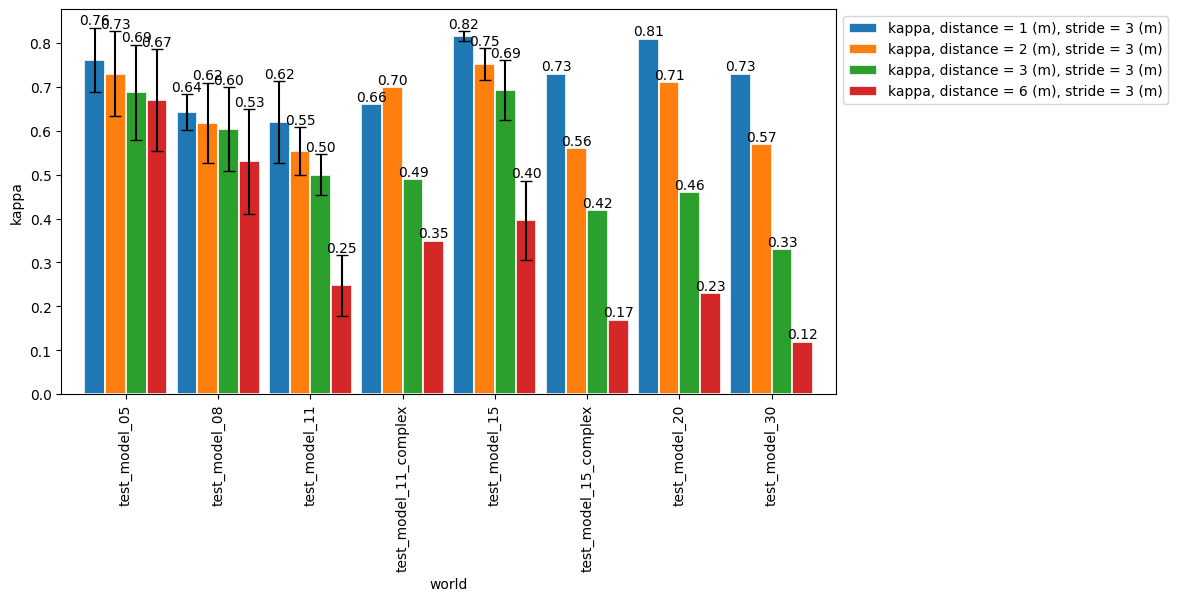

In [8]:
# kappa vs world for each d, s = 3
ax = df_sn_s3.groupby(['distance', 'world'])[["kappa"]].mean().unstack('distance').plot(kind='bar', figsize=(10, 5), yerr=df_sn_s3.groupby(['distance', 'world'])[["kappa"]].std().unstack('distance'), capsize=4, width=0.9, edgecolor='white', linewidth=1.2)
for container in ax.containers[1::2]:
	ax.bar_label(container, fmt='%.2f', label_type='edge')
	ax.legend(['kappa, distance = 1 (m), stride = 3 (m)', 'kappa, distance = 2 (m), stride = 3 (m)', 'kappa, distance = 3 (m), stride = 3 (m)', 'kappa, distance = 6 (m), stride = 3 (m)'], loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.xlabel('world')
plt.ylabel('kappa')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-kappa_vs_world_for_each_d.png', bbox_inches='tight')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/End-of-Study-Project-INSA-Lyon/graphics/ski_nordique-kappa_vs_world_for_each_d.png', bbox_inches='tight')
plt.show()

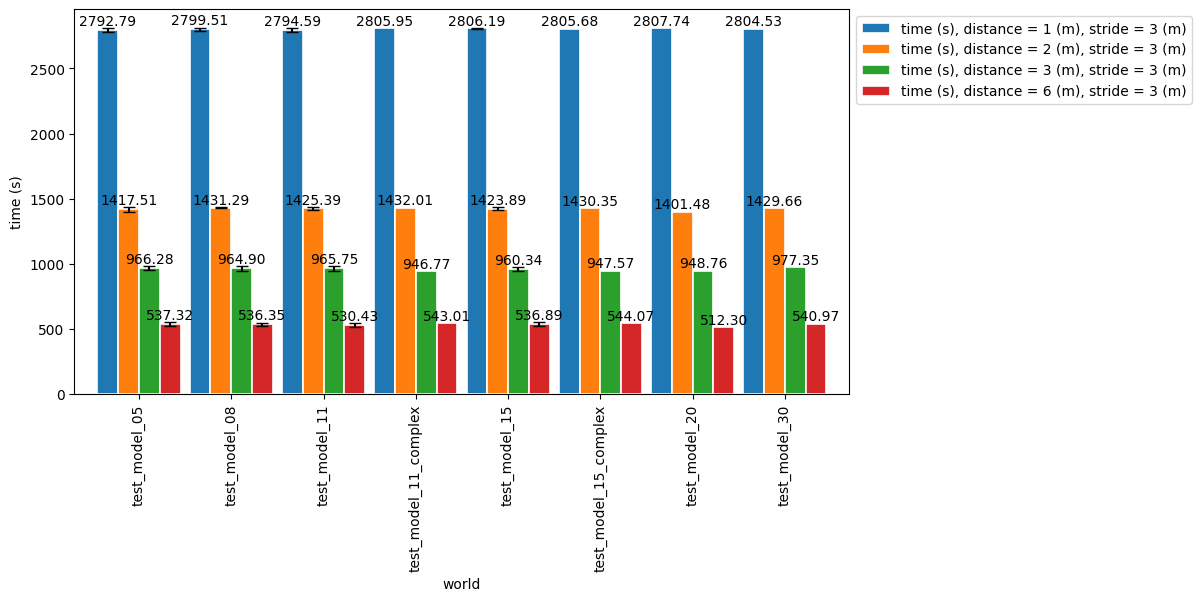

In [9]:
# time vs world for each d, s = 3
ax = df_sn_s3.groupby(['distance', 'world'])[["time"]].mean().unstack('distance').plot(kind='bar', figsize=(10, 5), yerr=df_sn_s3.groupby(['distance', 'world'])[["time"]].std().unstack('distance'), capsize=4, width=0.9, edgecolor='white', linewidth=1.2)
for container in ax.containers[1::2]:
	ax.bar_label(container, fmt='%.2f', label_type='edge')
	ax.legend(['time (s), distance = 1 (m), stride = 3 (m)', 'time (s), distance = 2 (m), stride = 3 (m)', 'time (s), distance = 3 (m), stride = 3 (m)', 'time (s), distance = 6 (m), stride = 3 (m)'], loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.xlabel('world')
plt.ylabel('time (s)')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-time_vs_world_for_each_d.png', bbox_inches='tight')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/End-of-Study-Project-INSA-Lyon/graphics/ski_nordique-time_vs_world_for_each_d.png', bbox_inches='tight')
plt.show()

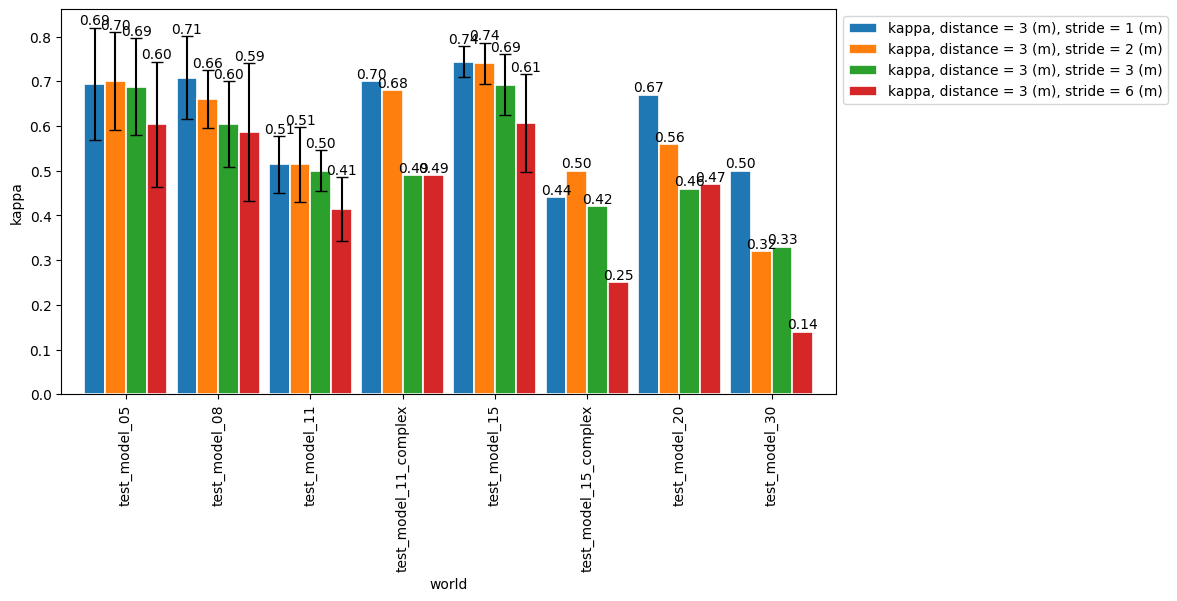

In [10]:
# kappa vs world for each s, d = 3
ax = df_sn_d3.groupby(['stride', 'world'])[["kappa"]].mean().unstack('stride').plot(kind='bar', figsize=(10, 5), yerr=df_sn_d3.groupby(['stride', 'world'])[["kappa"]].std().unstack('stride'), capsize=4, width=0.9, edgecolor='white', linewidth=1.2)
for container in ax.containers[1::2]:
	ax.bar_label(container, fmt='%.2f', label_type='edge')
	ax.legend(['kappa, distance = 3 (m), stride = 1 (m)', 'kappa, distance = 3 (m), stride = 2 (m)', 'kappa, distance = 3 (m), stride = 3 (m)', 'kappa, distance = 3 (m), stride = 6 (m)'], loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.xlabel('world')
plt.ylabel('kappa')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-kappa_vs_world_for_each_s.png', bbox_inches='tight')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/End-of-Study-Project-INSA-Lyon/graphics/ski_nordique-kappa_vs_world_for_each_s.png', bbox_inches='tight')
plt.show()

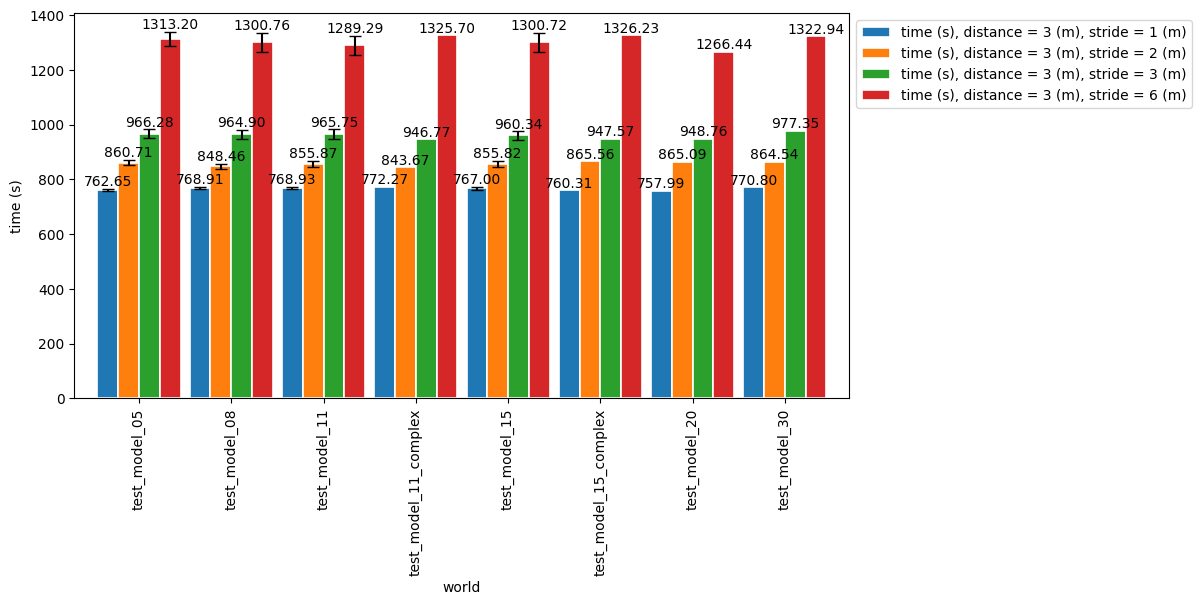

In [11]:
# time vs world for each s, d = 3
ax = df_sn_d3.groupby(['stride', 'world'])[["time"]].mean().unstack('stride').plot(kind='bar', figsize=(10, 5), yerr=df_sn_d3.groupby(['stride', 'world'])[["time"]].std().unstack('stride'), capsize=4, width=0.9, edgecolor='white', linewidth=1.2)
for container in ax.containers[1::2]:
	ax.bar_label(container, fmt='%.2f', label_type='edge')
	ax.legend(['time (s), distance = 3 (m), stride = 1 (m)', 'time (s), distance = 3 (m), stride = 2 (m)', 'time (s), distance = 3 (m), stride = 3 (m)', 'time (s), distance = 3 (m), stride = 6 (m)'], loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.xlabel('world')
plt.ylabel('time (s)')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-time_vs_world_for_each_s.png', bbox_inches='tight')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/End-of-Study-Project-INSA-Lyon/graphics/ski_nordique-time_vs_world_for_each_s.png', bbox_inches='tight')
plt.show()

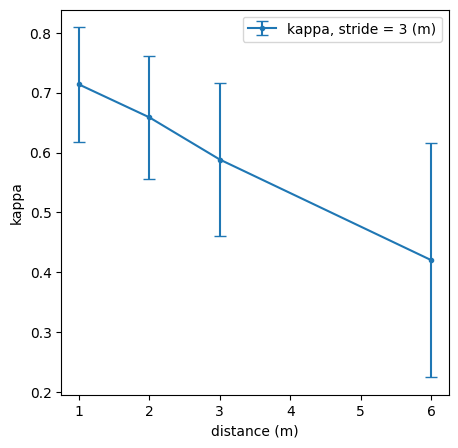

In [12]:
# kappa vs distance, s = 3
ax = df_sn_s3.groupby(['distance'])[["kappa"]].mean().plot(kind='line', marker='.', figsize=(5, 5), yerr=df_sn_s3.groupby(['distance'])[["kappa"]].std(), capsize=4)
ax.legend(['kappa, stride = 3 (m)'])
plt.xlabel('distance (m)')
plt.ylabel('kappa')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-kappa_vs_distance.png', bbox_inches='tight')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/End-of-Study-Project-INSA-Lyon/graphics/ski_nordique-kappa_vs_distance.png', bbox_inches='tight')
plt.show()

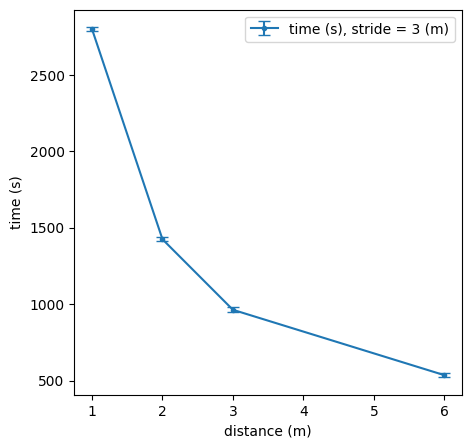

In [13]:
# time vs distance, s = 3
ax = df_sn_s3.groupby(['distance'])[["time"]].mean().plot(kind='line', marker='.', figsize=(5, 5), yerr=df_sn_s3.groupby(['distance'])[["time"]].std(), capsize=4)
ax.legend(['time (s), stride = 3 (m)'])
plt.xlabel('distance (m)')
plt.ylabel('time (s)')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-time_vs_distance.png', bbox_inches='tight')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/End-of-Study-Project-INSA-Lyon/graphics/ski_nordique-time_vs_distance.png', bbox_inches='tight')
plt.show()

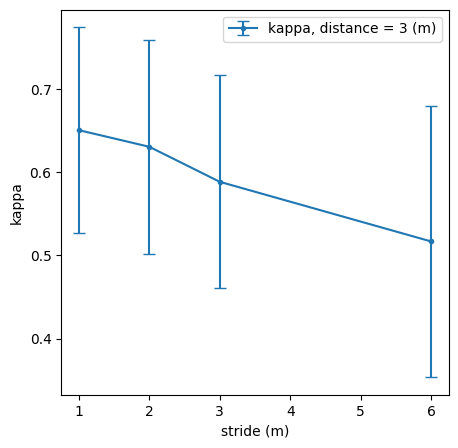

In [14]:
# kappa vs stride, distance = 3
ax = df_sn_d3.groupby(['stride'])[["kappa"]].mean().plot(kind='line', marker='.', figsize=(5, 5), yerr=df_sn_d3.groupby(['stride'])[["kappa"]].std(), capsize=4)
ax.legend(['kappa, distance = 3 (m)'])
plt.xlabel('stride (m)')
plt.ylabel('kappa')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-kappa_vs_stride.png', bbox_inches='tight')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/End-of-Study-Project-INSA-Lyon/graphics/ski_nordique-kappa_vs_stride.png', bbox_inches='tight')
plt.show()

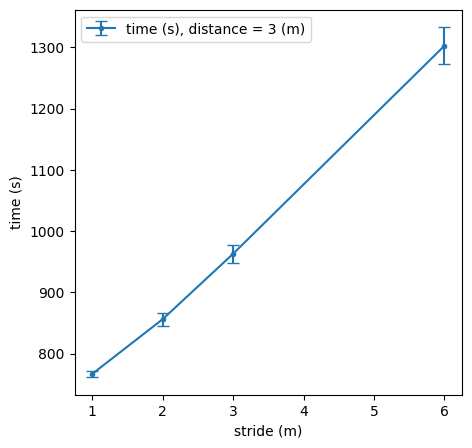

In [15]:
# time vs stride, distance = 3
ax = df_sn_d3.groupby(['stride'])[["time"]].mean().plot(kind='line', marker='.', figsize=(5, 5), yerr=df_sn_d3.groupby(['stride'])[["time"]].std(), capsize=4)
ax.legend(['time (s), distance = 3 (m)'])
plt.xlabel('stride (m)')
plt.ylabel('time (s)')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-time_vs_stride.png', bbox_inches='tight')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/End-of-Study-Project-INSA-Lyon/graphics/ski_nordique-time_vs_stride.png', bbox_inches='tight')
plt.show()

## Investigation polygonale

In [16]:
df_ip = df.loc[df['mission'] == 'investigation_polygonale']
df_ip

,mission,world,distance,stride,n_points,n_crawlers,kappa,time
480,investigation_polygonale,test_model_05,6.0,NaN,4.0,2.0,0.77,742.06
481,investigation_polygonale,test_model_05,3.0,NaN,4.0,2.0,0.86,558.83
482,investigation_polygonale,test_model_05,2.0,NaN,4.0,2.0,0.74,600.60
483,investigation_polygonale,test_model_05,1.0,NaN,4.0,2.0,0.86,500.68
484,investigation_polygonale,test_model_08,6.0,NaN,4.0,2.0,0.78,1421.44
485,investigation_polygonale,test_model_08,3.0,NaN,4.0,2.0,0.80,899.76
486,investigation_polygonale,test_model_08,2.0,NaN,4.0,2.0,0.83,824.83
487,investigation_polygonale,test_model_08,1.0,NaN,4.0,2.0,0.80,744.69
488,investigation_polygonale,test_model_11,6.0,NaN,4.0,2.0,0.73,2795.56
489,investigation_polygonale,test_model_11,3.0,NaN,4.0,2.0,0.75,1983.42


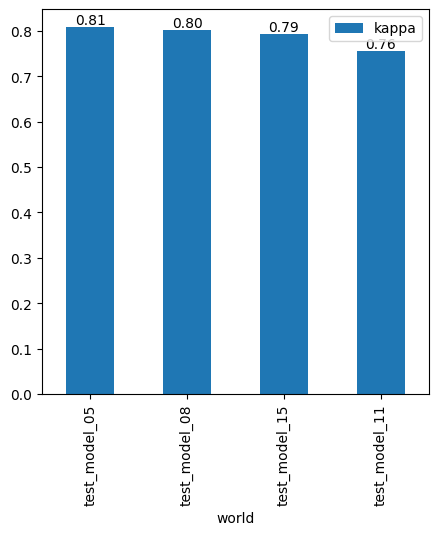

In [17]:
# kappa vs world
ax = df_ip.groupby(['world'])[["kappa"]].mean().sort_values(by='kappa', ascending=False).plot(kind='bar', figsize=(5, 5))
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/investigation_polygonale-kappa_vs_world.png', bbox_inches='tight')
plt.show()

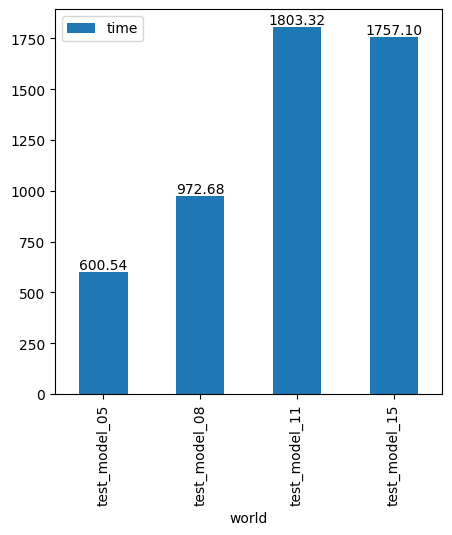

In [18]:
# time vs world
ax = df_ip.groupby(['world'])[["time"]].mean().plot(kind='bar', figsize=(5, 5))
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/investigation_polygonale-time_vs_world.png', bbox_inches='tight')
plt.show()

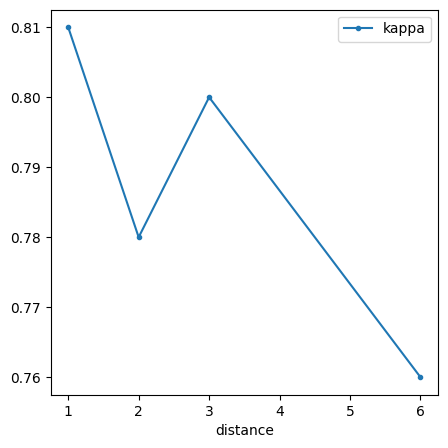

In [19]:
# kappa vs distance
df_ip.groupby(['distance'])[["kappa"]].mean().plot(kind='line', marker='.', figsize=(5, 5))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/investigation_polygonale-kappa_vs_distance.png', bbox_inches='tight')
plt.show()

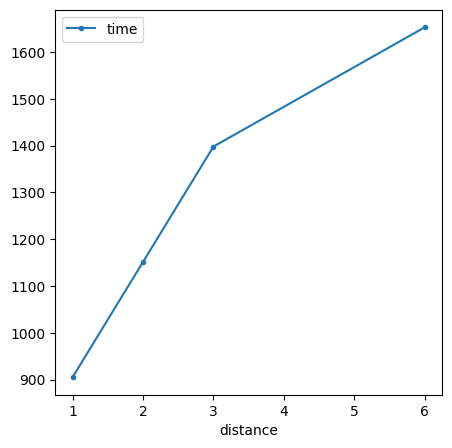

In [20]:
# time vs distance
df_ip.groupby(['distance'])[["time"]].mean().plot(kind='line', marker='.', figsize=(5, 5))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/investigation_polygonale-time_vs_distance.png', bbox_inches='tight')
plt.show()

## Peinture au rouleau VS Ski nordique VS Investigation polygonale

In [21]:
df.loc[(df['distance'] == 1.0) & (df['world'] == 'test_model_5'), 'time'] = df_ip.loc[(df_ip['distance'] == 1.0) & (df_ip['world'] == 'test_model_5'), 'time'] + df_par.loc[(df_par['distance'] == 1.0) & (df_par['world'] == 'test_model_5'), 'time'].values[0]
df.loc[(df['distance'] == 2.0) & (df['world'] == 'test_model_5'), 'time'] = df_ip.loc[(df_ip['distance'] == 2.0) & (df_ip['world'] == 'test_model_5'), 'time'] + df_par.loc[(df_par['distance'] == 2.0) & (df_par['world'] == 'test_model_5'), 'time'].values[0]
df.loc[(df['distance'] == 3.0) & (df['world'] == 'test_model_5'), 'time'] = df_ip.loc[(df_ip['distance'] == 3.0) & (df_ip['world'] == 'test_model_5'), 'time'] + df_par.loc[(df_par['distance'] == 3.0) & (df_par['world'] == 'test_model_5'), 'time'].values[0]
df.loc[(df['distance'] == 6.0) & (df['world'] == 'test_model_5'), 'time'] = df_ip.loc[(df_ip['distance'] == 6.0) & (df_ip['world'] == 'test_model_5'), 'time'] + df_par.loc[(df_par['distance'] == 6.0) & (df_par['world'] == 'test_model_5'), 'time'].values[0]

df.loc[(df['distance'] == 1.0) & (df['world'] == 'test_model_8'), 'time'] = df_ip.loc[(df_ip['distance'] == 1.0) & (df_ip['world'] == 'test_model_8'), 'time'] + df_par.loc[(df_par['distance'] == 1.0) & (df_par['world'] == 'test_model_8'), 'time'].values[0]
df.loc[(df['distance'] == 2.0) & (df['world'] == 'test_model_8'), 'time'] = df_ip.loc[(df_ip['distance'] == 2.0) & (df_ip['world'] == 'test_model_8'), 'time'] + df_par.loc[(df_par['distance'] == 2.0) & (df_par['world'] == 'test_model_8'), 'time'].values[0]
df.loc[(df['distance'] == 3.0) & (df['world'] == 'test_model_8'), 'time'] = df_ip.loc[(df_ip['distance'] == 3.0) & (df_ip['world'] == 'test_model_8'), 'time'] + df_par.loc[(df_par['distance'] == 3.0) & (df_par['world'] == 'test_model_8'), 'time'].values[0]
df.loc[(df['distance'] == 6.0) & (df['world'] == 'test_model_8'), 'time'] = df_ip.loc[(df_ip['distance'] == 6.0) & (df_ip['world'] == 'test_model_8'), 'time'] + df_par.loc[(df_par['distance'] == 6.0) & (df_par['world'] == 'test_model_8'), 'time'].values[0]

df.loc[(df['distance'] == 1.0) & (df['world'] == 'test_model_11'), 'time'] = df_ip.loc[(df_ip['distance'] == 1.0) & (df_ip['world'] == 'test_model_11'), 'time'] + df_par.loc[(df_par['distance'] == 1.0) & (df_par['world'] == 'test_model_11'), 'time'].values[0]
df.loc[(df['distance'] == 2.0) & (df['world'] == 'test_model_11'), 'time'] = df_ip.loc[(df_ip['distance'] == 2.0) & (df_ip['world'] == 'test_model_11'), 'time'] + df_par.loc[(df_par['distance'] == 2.0) & (df_par['world'] == 'test_model_11'), 'time'].values[0]
df.loc[(df['distance'] == 3.0) & (df['world'] == 'test_model_11'), 'time'] = df_ip.loc[(df_ip['distance'] == 3.0) & (df_ip['world'] == 'test_model_11'), 'time'] + df_par.loc[(df_par['distance'] == 3.0) & (df_par['world'] == 'test_model_11'), 'time'].values[0]
df.loc[(df['distance'] == 6.0) & (df['world'] == 'test_model_11'), 'time'] = df_ip.loc[(df_ip['distance'] == 6.0) & (df_ip['world'] == 'test_model_11'), 'time'] + df_par.loc[(df_par['distance'] == 6.0) & (df_par['world'] == 'test_model_11'), 'time'].values[0]

df.loc[(df['distance'] == 1.0) & (df['world'] == 'test_model_15'), 'time'] = df_ip.loc[(df_ip['distance'] == 1.0) & (df_ip['world'] == 'test_model_15'), 'time'] + df_par.loc[(df_par['distance'] == 1.0) & (df_par['world'] == 'test_model_15'), 'time'].values[0]
df.loc[(df['distance'] == 2.0) & (df['world'] == 'test_model_15'), 'time'] = df_ip.loc[(df_ip['distance'] == 2.0) & (df_ip['world'] == 'test_model_15'), 'time'] + df_par.loc[(df_par['distance'] == 2.0) & (df_par['world'] == 'test_model_15'), 'time'].values[0]
df.loc[(df['distance'] == 3.0) & (df['world'] == 'test_model_15'), 'time'] = df_ip.loc[(df_ip['distance'] == 3.0) & (df_ip['world'] == 'test_model_15'), 'time'] + df_par.loc[(df_par['distance'] == 3.0) & (df_par['world'] == 'test_model_15'), 'time'].values[0]
df.loc[(df['distance'] == 6.0) & (df['world'] == 'test_model_15'), 'time'] = df_ip.loc[(df_ip['distance'] == 6.0) & (df_ip['world'] == 'test_model_15'), 'time'] + df_par.loc[(df_par['distance'] == 6.0) & (df_par['world'] == 'test_model_15'), 'time'].values[0]

df

IndexError: index 0 is out of bounds for axis 0 with size 0

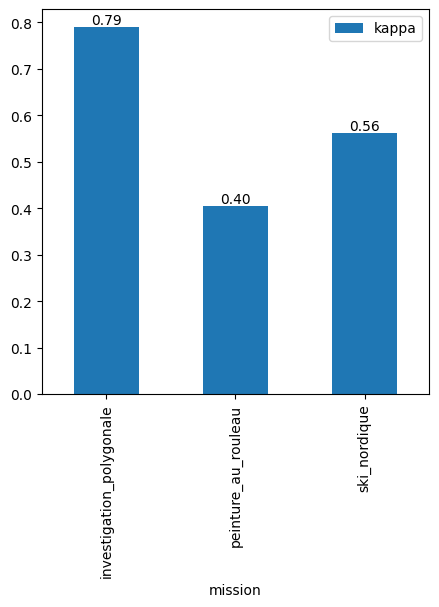

peinture au rouleau kappa: 0.40
ski nordique kappa: 0.56
investigation polygonale kappa: 0.79


In [ ]:
# peinture au rouleau kappa vs ski nordique kappa
ax = df.groupby(['mission'])[["kappa"]].mean().plot(kind='bar', figsize=(5, 5))
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/peinture_au_rouleau-kappa_vs_ski_nordique_vs_investigation_polygonale-kappa.png', bbox_inches='tight')
plt.show()
print(f'peinture au rouleau kappa: {df.loc[df["mission"] == "peinture_au_rouleau"]["kappa"].mean():.2f}')
print(f'ski nordique kappa: {df.loc[df["mission"] == "ski_nordique"]["kappa"].mean():.2f}')
print(f'investigation polygonale kappa: {df.loc[df["mission"] == "investigation_polygonale"]["kappa"].mean():.2f}')

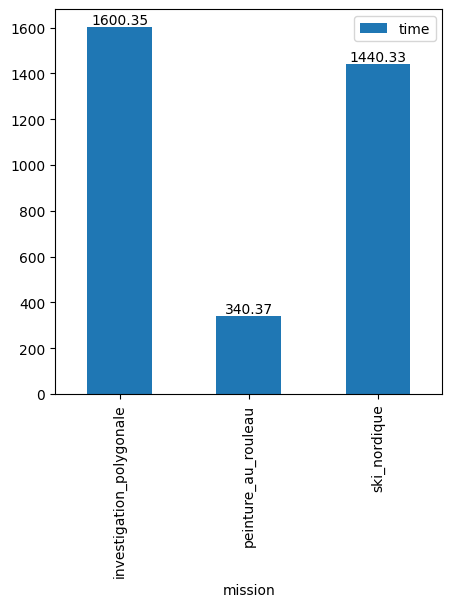

peinture au rouleau time: 340.37 sec (5.67) min
ski nordique time: 1440.33 sec (24.01 min)
investigation polygonale time: 1600.35 sec (26.67 min)


In [ ]:
# peinture au rouleau time vs ski nordique time vs investigation polygonale time
ax = df.groupby(['mission'])[["time"]].mean().plot(kind='bar', figsize=(5, 5))
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/peinture_au_rouleau-time_vs_ski_nordique-time.png', bbox_inches='tight')
plt.show()
print(f'peinture au rouleau time: {df.loc[df["mission"] == "peinture_au_rouleau"]["time"].mean():.2f} sec ({df.loc[df["mission"] == "peinture_au_rouleau"]["time"].mean()/60:.2f}) min')
print(f'ski nordique time: {df.loc[df["mission"] == "ski_nordique"]["time"].mean():.2f} sec ({df.loc[df["mission"] == "ski_nordique"]["time"].mean()/60:.2f} min)')
print(f'investigation polygonale time: {df.loc[df["mission"] == "investigation_polygonale"]["time"].mean():.2f} sec ({df.loc[df["mission"] == "investigation_polygonale"]["time"].mean()/60:.2f} min)')

## Evolution entre Peinture au rouleau et Investigation polygonale

In [ ]:
# only select subset where we have data for all missions
df_base = df_par.loc[df_par['mission'] == 'peinture_au_rouleau'] 
df_base = pd.concat([
    df_base.loc[df_base['world'] == 'test_model_5'], 
    df_base.loc[df_base['world'] == 'test_model_8'], 
    df_base.loc[df_base['world'] == 'test_model_11'], 
    df_base.loc[df_base['world'] == 'test_model_15']
])
df_base.drop(df_base[(df_base['distance'] == 6.0)].index, inplace=True)

df_improve = df_ip.loc[df_ip['mission'] == 'investigation_polygonale']
df_improve = pd.concat([
    df_improve.loc[df_improve['world'] == 'test_model_5'], 
    df_improve.loc[df_improve['world'] == 'test_model_8'],
	df_improve.loc[df_improve['world'] == 'test_model_11'],
    df_improve.loc[df_improve['world'] == 'test_model_15']
])
df_improve.drop(df_improve[(df_improve['distance'] == 6.0)].index, inplace=True)

df_other = df_sn.loc[df_sn['mission'] == 'ski_nordique']
df_other = pd.concat([
    df_other.loc[df_other['world'] == 'test_model_5'], 
    df_other.loc[df_other['world'] == 'test_model_8'], 
    df_other.loc[df_other['world'] == 'test_model_11'], 
    df_other.loc[df_other['world'] == 'test_model_15']
])
df_other.drop(df_other[(df_other['distance'] == 6.0)].index, inplace=True)

df_final = pd.concat([df_base, df_improve, df_other])

df_final

,mission,world,distance,stride,n_points,n_crawlers,kappa,time
1,peinture_au_rouleau,test_model_5,3.0,NaN,NaN,NaN,0.29,252.20
2,peinture_au_rouleau,test_model_5,2.0,NaN,NaN,NaN,0.48,339.83
3,peinture_au_rouleau,test_model_5,1.0,NaN,NaN,NaN,0.62,553.13
5,peinture_au_rouleau,test_model_8,3.0,NaN,NaN,NaN,0.44,251.97
6,peinture_au_rouleau,test_model_8,2.0,NaN,NaN,NaN,0.62,338.82
...,...,...,...,...,...,...,...,...
91,ski_nordique,test_model_15,2.0,6.0,NaN,NaN,0.72,1960.88
92,ski_nordique,test_model_15,1.0,1.0,NaN,NaN,0.81,2132.64
93,ski_nordique,test_model_15,1.0,2.0,NaN,NaN,0.81,2441.03
94,ski_nordique,test_model_15,1.0,3.0,NaN,NaN,0.80,2810.34


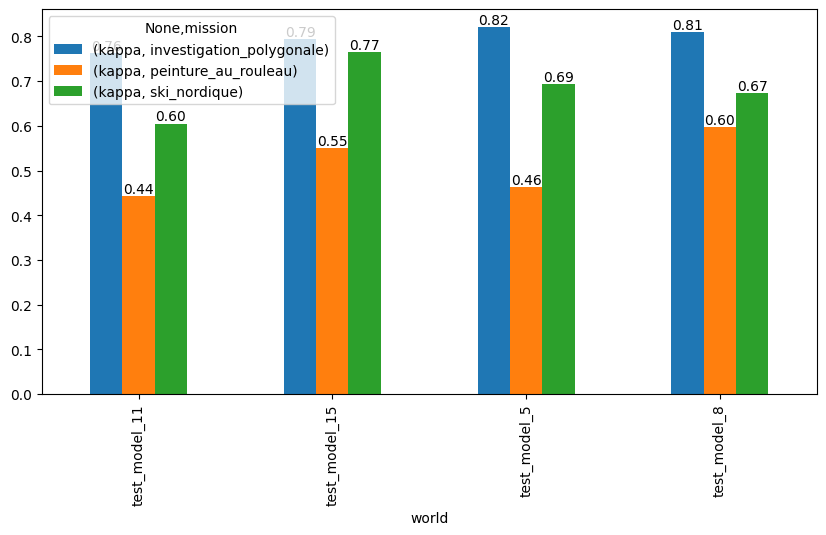

In [ ]:
# evolution of kappa between peinture au rouleau and investigation polygonale
ax = df_final.groupby(['mission', 'world'])[["kappa"]].mean().unstack('mission').plot(kind='bar', figsize=(10, 5))
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

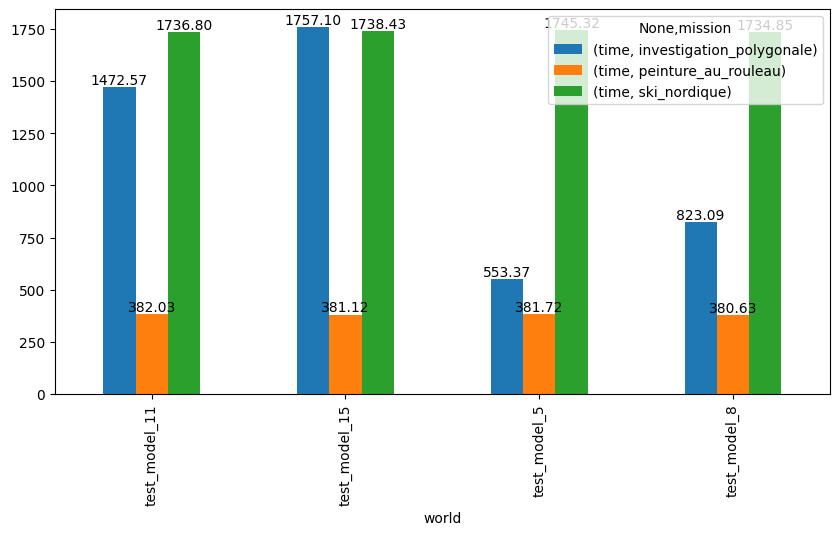

In [ ]:
# evolution of time between peinture au rouleau and investigation polygonale
ax = df_final.groupby(['mission', 'world'])[["time"]].mean().unstack('mission').plot(kind='bar', figsize=(10, 5))
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

## Density

In [ ]:
import cv2 as cv

def get_density(template):
	l, w, _ = template.shape
	density = 0
	for i in range(l):
		for j in range(w):
			if template[i][j][0] == 0 and template[i][j][1] == 0 and template[i][j][2] == 0:
				density += 1
	# print(density)
	return density / (l * w)

print(f'test_model_05: {(get_density(cv.imread("../graphics/test_model_05_1.png")) + get_density(cv.imread("../graphics/test_model_05_2.png")) + get_density(cv.imread("../graphics/test_model_05_3.png")) + get_density(cv.imread("../graphics/test_model_05_4.png")) + get_density(cv.imread("../graphics/test_model_05_5.png"))) / 5}')
print(f'test_model_08: {(get_density(cv.imread("../graphics/test_model_08_1.png")) + get_density(cv.imread("../graphics/test_model_08_2.png")) + get_density(cv.imread("../graphics/test_model_08_3.png")) + get_density(cv.imread("../graphics/test_model_08_4.png")) + get_density(cv.imread("../graphics/test_model_08_5.png"))) / 5}')
print(f'test_model_11: {(get_density(cv.imread("../graphics/test_model_11_1.png")) + get_density(cv.imread("../graphics/test_model_11_2.png")) + get_density(cv.imread("../graphics/test_model_11_3.png")) + get_density(cv.imread("../graphics/test_model_11_4.png")) + get_density(cv.imread("../graphics/test_model_11_5.png"))) / 5}')
print(f'test_model_15: {(get_density(cv.imread("../graphics/test_model_15_1.png")) + get_density(cv.imread("../graphics/test_model_15_2.png")) + get_density(cv.imread("../graphics/test_model_15_3.png")) + get_density(cv.imread("../graphics/test_model_15_4.png")) + get_density(cv.imread("../graphics/test_model_15_5.png"))) / 5}')
print(f'test_model_20: {get_density(cv.imread("../graphics/test_model_20_1.png"))}')
print(f'test_model_30: {get_density(cv.imread("../graphics/test_model_30_1.png"))}')
print(f'test_model_11_complex: {get_density(cv.imread("../graphics/test_model_11_complex_1.png"))}')
print(f'test_model_15_complex: {get_density(cv.imread("../graphics/test_model_15_complex_1.png"))}')

test_model_05: 0.01137809720203407
test_model_08: 0.025477608615308733
test_model_11: 0.034336451631681045
test_model_15: 0.02889042237150303
test_model_20: 0.03623010602960977
test_model_30: 0.05225033047990897
test_model_11_complex: 0.04990323302897488
test_model_15_complex: 0.08809014817154898


## Archive

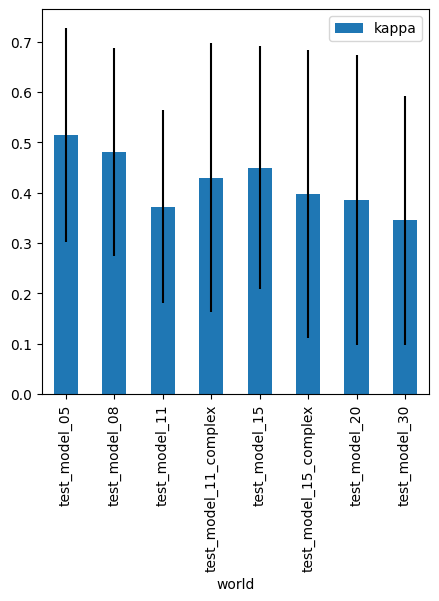

Average kappa: 0.44 +/- 0.22


In [ ]:
# kappa vs world
ax = df_par.groupby(['world'])[["kappa"]].mean().plot(kind='bar', figsize=(5, 5), yerr=df_par.groupby(['world'])[["kappa"]].std())
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/peinture_au_rouleau-kappa_vs_world.png', bbox_inches='tight')
plt.show()
print(f'Average kappa: {df_par[["kappa"]].mean().values[0]:.2f} +/- {df_par[["kappa"]].std().values[0]:.2f}')

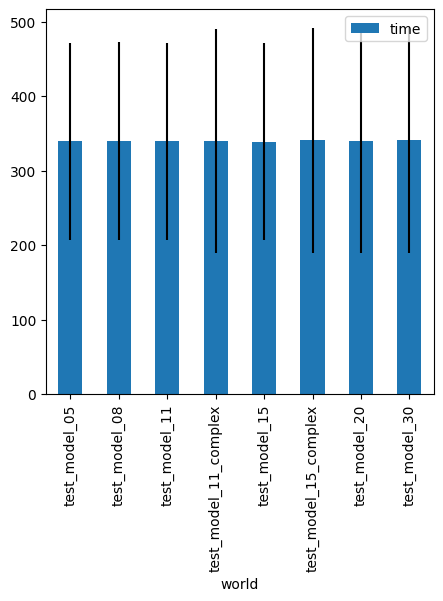

Average time: 339.48 +/- 129.90 sec (5.66 +/- 2.17 min)


In [ ]:
# time vs world
df_par.groupby(['world'])[["time"]].mean().plot(kind='bar', figsize=(5, 5), yerr=df_par.groupby(['world'])[["time"]].std())
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/peinture_au_rouleau-time_vs_world.png', bbox_inches='tight')
plt.show()
print(f'Average time: {df_par[["time"]].mean().values[0]:.2f} +/- {df_par[["time"]].std().values[0]:.2f} sec ({df_par[["time"]].mean().values[0]/60:.2f} +/- {df_par[["time"]].std().values[0]/60:.2f} min)')

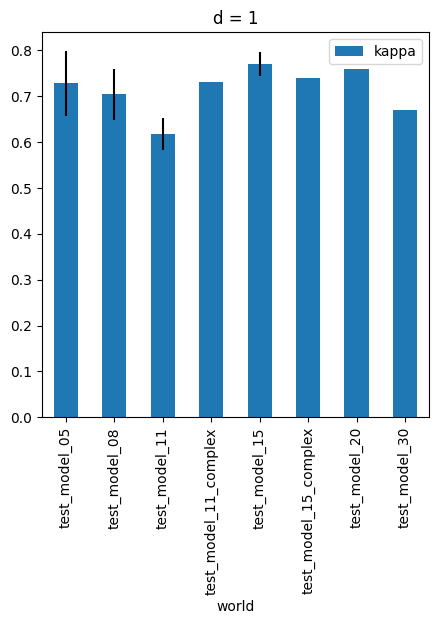

Average kappa: 0.71 +/- 0.07


In [ ]:
# kappa vs world for d = 1
ax = df_par_1.groupby(['world'])[["kappa"]].mean().plot(kind='bar', figsize=(5, 5), yerr=df_par_1.groupby(['world'])[["kappa"]].std())
ax.set_title("d = 1")
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/peinture_au_rouleau-kappa_vs_world_d1.png', bbox_inches='tight')
plt.show()
print(f'Average kappa: {df_par_1[["kappa"]].mean().values[0]:.2f} +/- {df_par_1[["kappa"]].std().values[0]:.2f}')

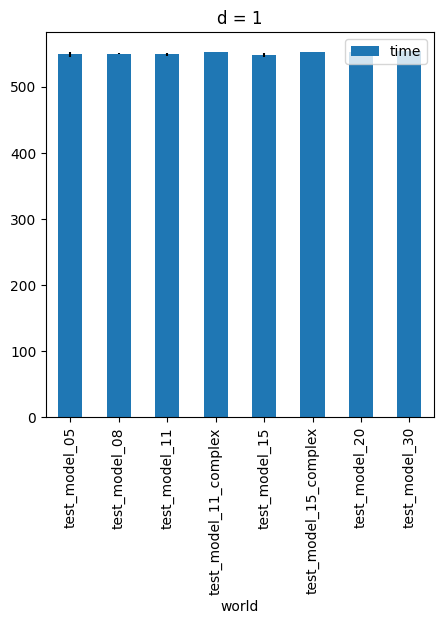

Average time: 549.73 +/- 2.82 sec (9.16 +/- 0.05 min)


In [ ]:
# time vs world for d = 1
ax = df_par_1.groupby(['world'])[["time"]].mean().plot(kind='bar', figsize=(5, 5), yerr=df_par_1.groupby(['world'])[["time"]].std())
ax.set_title("d = 1")
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/peinture_au_rouleau-time_vs_world_d1.png', bbox_inches='tight')
plt.show()
print(f'Average time: {df_par_1[["time"]].mean().values[0]:.2f} +/- {df_par_1[["time"]].std().values[0]:.2f} sec ({df_par_1[["time"]].mean().values[0]/60:.2f} +/- {df_par_1[["time"]].std().values[0]/60:.2f} min)')

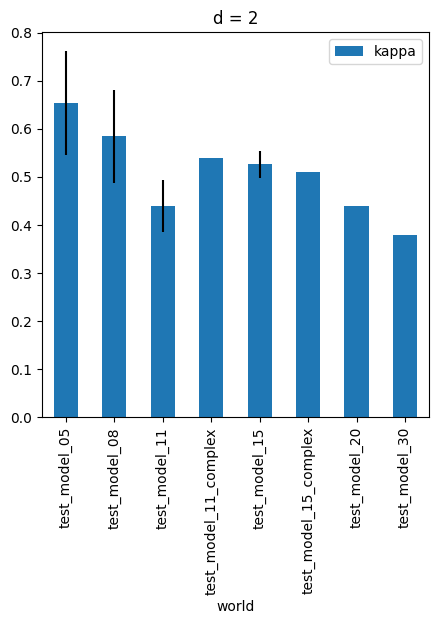

Average kappa: 0.54 +/- 0.11


In [ ]:
# kappa vs world for d = 2
ax = df_par_2.groupby(['world'])[["kappa"]].mean().plot(kind='bar', figsize=(5, 5), yerr=df_par_2.groupby(['world'])[["kappa"]].std())
ax.set_title("d = 2")
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/peinture_au_rouleau-kappa_vs_world_d2.png', bbox_inches='tight')
plt.show()
print(f'Average kappa: {df_par_2[["kappa"]].mean().values[0]:.2f} +/- {df_par_2[["kappa"]].std().values[0]:.2f}')

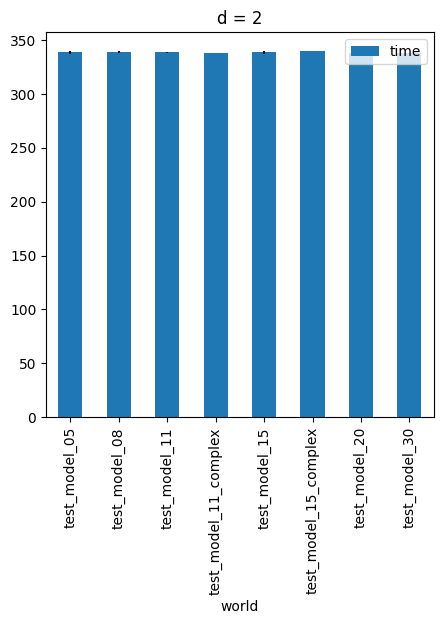

Average time: 338.64 +/- 1.01 sec (5.64 +/- 0.02 min)


In [ ]:
# time vs world for d = 2
ax = df_par_2.groupby(['world'])[["time"]].mean().plot(kind='bar', figsize=(5, 5), yerr=df_par_2.groupby(['world'])[["time"]].std())
ax.set_title("d = 2")
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/peinture_au_rouleau-time_vs_world_d2.png', bbox_inches='tight')
plt.show()
print(f'Average time: {df_par_2[["time"]].mean().values[0]:.2f} +/- {df_par_2[["time"]].std().values[0]:.2f} sec ({df_par_2[["time"]].mean().values[0]/60:.2f} +/- {df_par_2[["time"]].std().values[0]/60:.2f} min)')

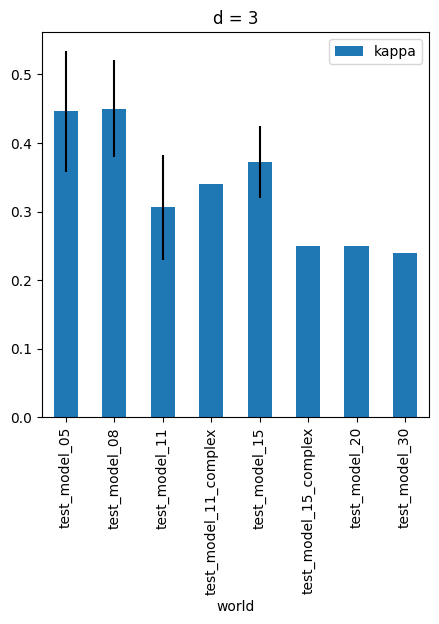

Average kappa: 0.37 +/- 0.10


In [ ]:
# kappa vs world for d = 3
df_par_3 = df_par.loc[df_par['distance'] == 3]
ax = df_par_3.groupby(['world'])[["kappa"]].mean().plot(kind='bar', figsize=(5, 5), yerr=df_par_3.groupby(['world'])[["kappa"]].std())
ax.set_title("d = 3")
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/peinture_au_rouleau-kappa_vs_world_d3.png', bbox_inches='tight')
plt.show()
print(f'Average kappa: {df_par_3[["kappa"]].mean().values[0]:.2f} +/- {df_par_3[["kappa"]].std().values[0]:.2f}')

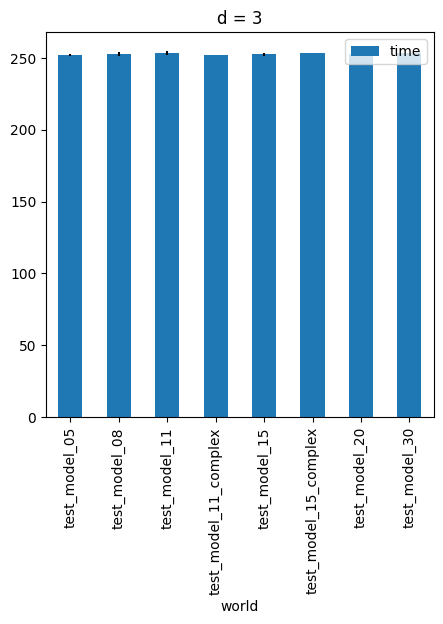

Average time: 252.79 +/- 1.16 sec (4.21 +/- 0.02 min)


In [ ]:
# time vs world for d = 3
ax = df_par_3.groupby(['world'])[["time"]].mean().plot(kind='bar', figsize=(5, 5), yerr=df_par_3.groupby(['world'])[["time"]].std())
ax.set_title("d = 3")
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/peinture_au_rouleau-time_vs_world_d3.png', bbox_inches='tight')
plt.show()
print(f'Average time: {df_par_3[["time"]].mean().values[0]:.2f} +/- {df_par_3[["time"]].std().values[0]:.2f} sec ({df_par_3[["time"]].mean().values[0]/60:.2f} +/- {df_par_3[["time"]].std().values[0]/60:.2f} min)')

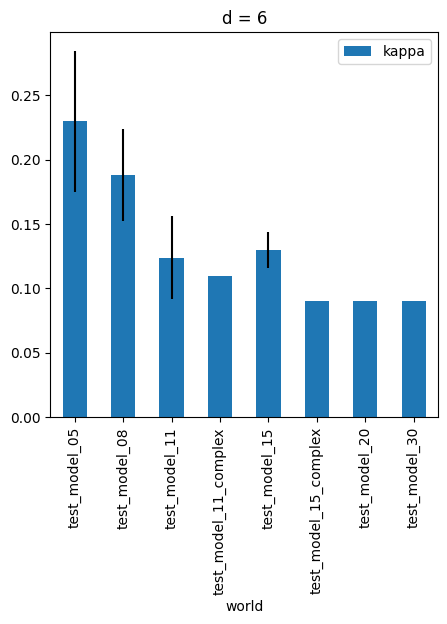

Average kappa: 0.16 +/- 0.06


In [ ]:
# kappa vs world for d = 6
df_par_6 = df_par.loc[df_par['distance'] == 6]
ax = df_par_6.groupby(['world'])[["kappa"]].mean().plot(kind='bar', figsize=(5, 5), yerr=df_par_6.groupby(['world'])[["kappa"]].std())
ax.set_title("d = 6")
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/peinture_au_rouleau-kappa_vs_world_d6.png', bbox_inches='tight')
plt.show()
print(f'Average kappa: {df_par_6[["kappa"]].mean().values[0]:.2f} +/- {df_par_6[["kappa"]].std().values[0]:.2f}')

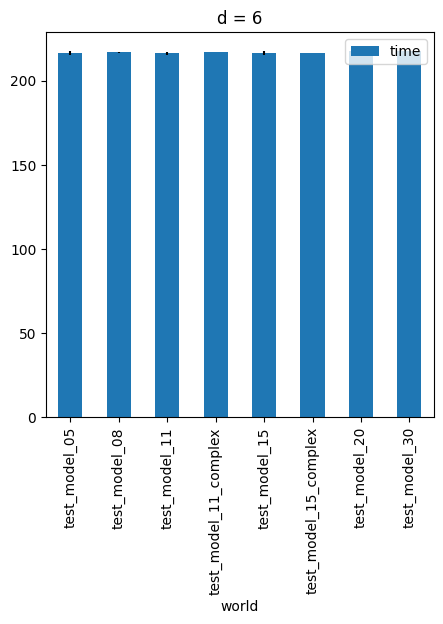

Average time: 216.75 +/- 0.93 sec (3.61 +/- 0.02 min)


In [ ]:
# time vs world for d = 6
ax = df_par_6.groupby(['world'])[["time"]].mean().plot(kind='bar', figsize=(5, 5), yerr=df_par_6.groupby(['world'])[["time"]].std())
ax.set_title("d = 6")
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/peinture_au_rouleau-time_vs_world_d6.png', bbox_inches='tight')
plt.show()
print(f'Average time: {df_par_6[["time"]].mean().values[0]:.2f} +/- {df_par_6[["time"]].std().values[0]:.2f} sec ({df_par_6[["time"]].mean().values[0]/60:.2f} +/- {df_par_6[["time"]].std().values[0]/60:.2f} min)')

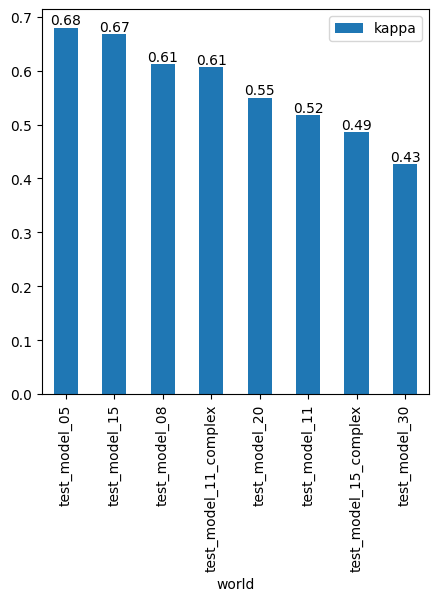

In [ ]:
# kappa vs world
ax = df_sn.groupby(['world'])[["kappa"]].mean().sort_values(by='kappa', ascending=False).plot(kind='bar', figsize=(5, 5))
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-kappa_vs_world.png', bbox_inches='tight')
plt.show()

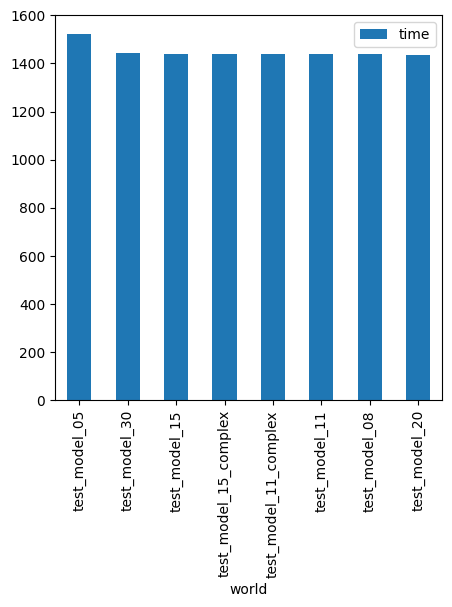

In [ ]:
# time vs world
df_sn.groupby(['world'])[["time"]].mean().sort_values(by='time', ascending=False).plot(kind='bar', figsize=(5, 5))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-time_vs_world.png', bbox_inches='tight')
plt.show()

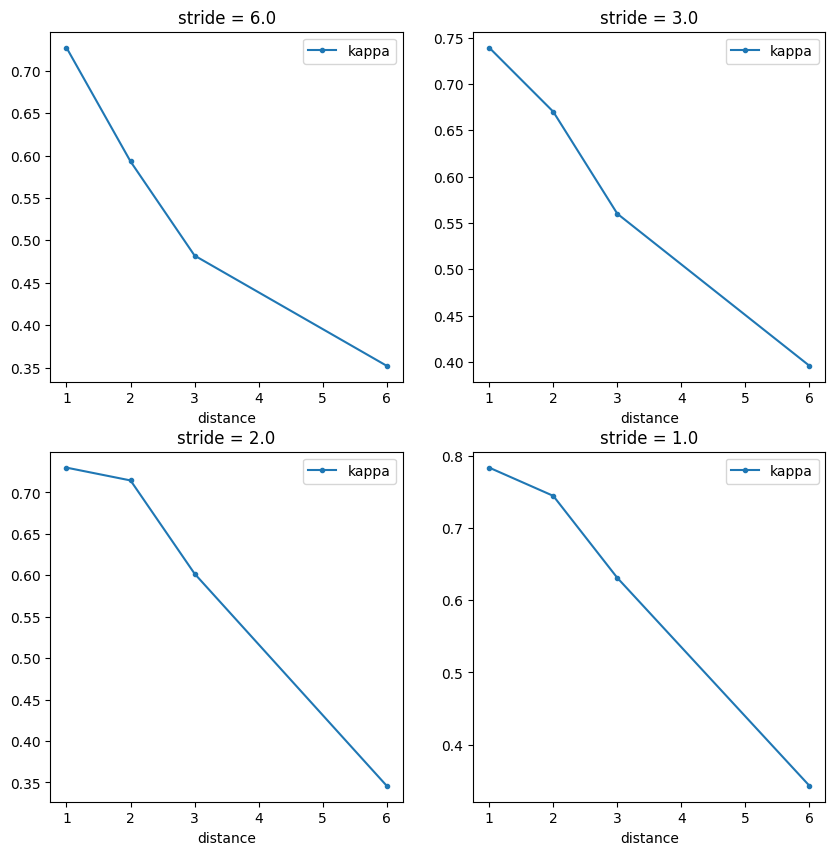

In [ ]:
# kappa vs distance, specific stride
df_sn_6 = df_sn.loc[df_sn['stride'] == 6.0]
df_sn_3 = df_sn.loc[df_sn['stride'] == 3.0]
df_sn_2 = df_sn.loc[df_sn['stride'] == 2.0]
df_sn_1 = df_sn.loc[df_sn['stride'] == 1.0]

fig, axes = plt.subplots(nrows=2, ncols=2)
df_sn_6.groupby(['distance'])[["kappa"]].mean().plot(kind='line', marker='.', ax=axes[0,0], title='stride = 6.0', figsize=(10,10))
df_sn_3.groupby(['distance'])[["kappa"]].mean().plot(kind='line', marker='.', ax=axes[0,1], title='stride = 3.0', figsize=(10,10))
df_sn_2.groupby(['distance'])[["kappa"]].mean().plot(kind='line', marker='.', ax=axes[1,0], title='stride = 2.0', figsize=(10,10))
df_sn_1.groupby(['distance'])[["kappa"]].mean().plot(kind='line', marker='.', ax=axes[1,1], title='stride = 1.0', figsize=(10,10))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-kappa_vs_distance_specific_stride.png', bbox_inches='tight')
plt.show()

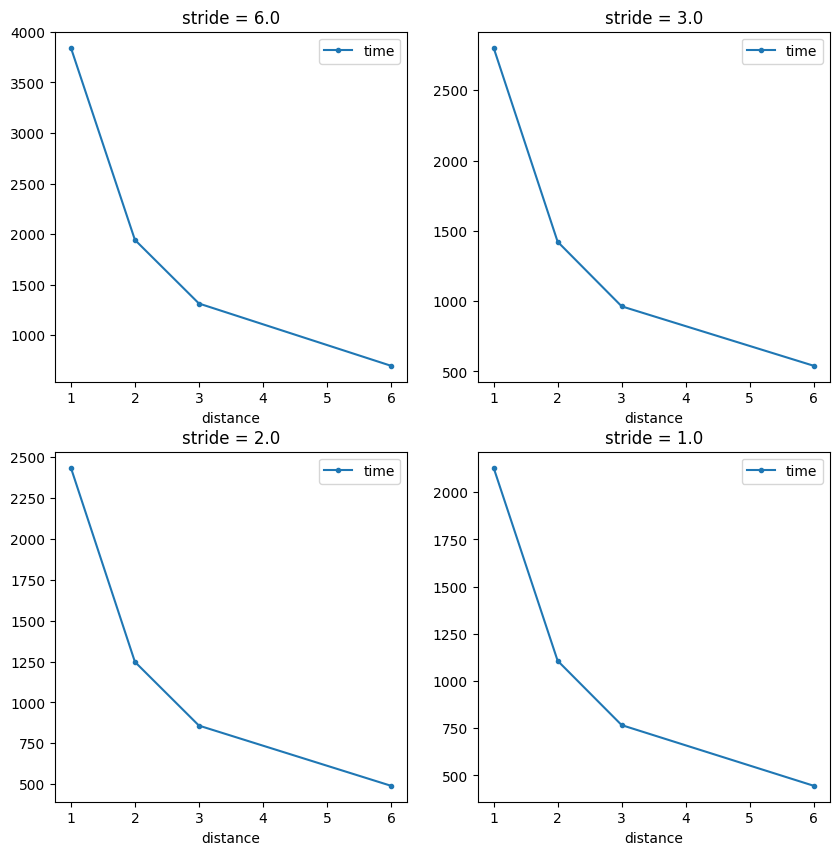

In [ ]:
# time vs distance, specific stride
fig, axes = plt.subplots(nrows=2, ncols=2)
df_sn_6.groupby(['distance'])[["time"]].mean().plot(kind='line', marker='.', ax=axes[0,0], title='stride = 6.0', figsize=(10,10))
df_sn_3.groupby(['distance'])[["time"]].mean().plot(kind='line', marker='.', ax=axes[0,1], title='stride = 3.0', figsize=(10,10))
df_sn_2.groupby(['distance'])[["time"]].mean().plot(kind='line', marker='.', ax=axes[1,0], title='stride = 2.0', figsize=(10,10))
df_sn_1.groupby(['distance'])[["time"]].mean().plot(kind='line', marker='.', ax=axes[1,1], title='stride = 1.0', figsize=(10,10))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-time_vs_distance_specific_stride.png', bbox_inches='tight')
plt.show()

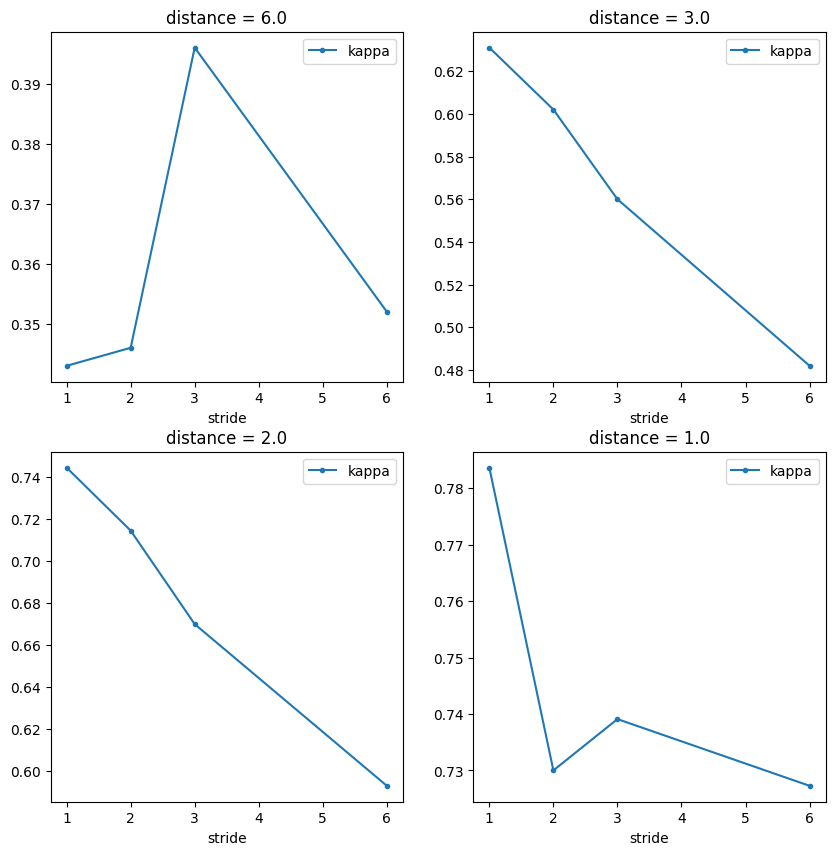

In [ ]:
# kappa vs stride, specific distance
df_sn_6 = df_sn.loc[df_sn['distance'] == 6.0]
df_sn_3 = df_sn.loc[df_sn['distance'] == 3.0]
df_sn_2 = df_sn.loc[df_sn['distance'] == 2.0]
df_sn_1 = df_sn.loc[df_sn['distance'] == 1.0]

fig, axes = plt.subplots(nrows=2, ncols=2)
df_sn_6.groupby(['stride'])[["kappa"]].mean().plot(kind='line', marker='.', ax=axes[0,0], title='distance = 6.0', figsize=(10,10))
df_sn_3.groupby(['stride'])[["kappa"]].mean().plot(kind='line', marker='.', ax=axes[0,1], title='distance = 3.0', figsize=(10,10))
df_sn_2.groupby(['stride'])[["kappa"]].mean().plot(kind='line', marker='.', ax=axes[1,0], title='distance = 2.0', figsize=(10,10))
df_sn_1.groupby(['stride'])[["kappa"]].mean().plot(kind='line', marker='.', ax=axes[1,1], title='distance = 1.0', figsize=(10,10))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-kappa_vs_stride_specific_distance.png', bbox_inches='tight')
plt.show()

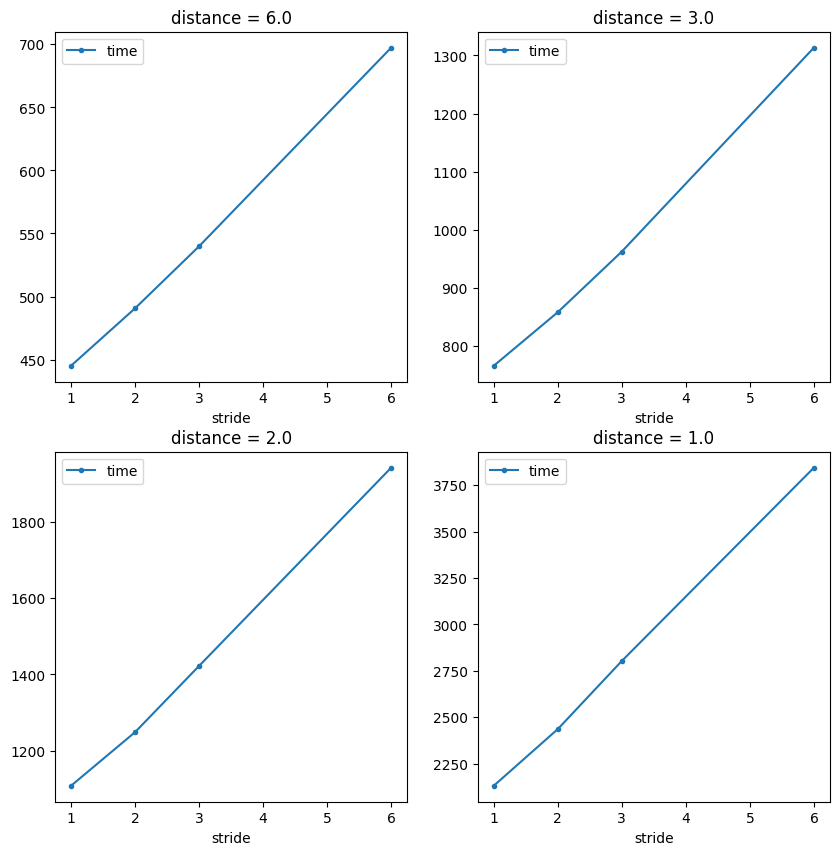

In [ ]:
# time vs stride, specific distance
fig, axes = plt.subplots(nrows=2, ncols=2)
df_sn_6.groupby(['stride'])[["time"]].mean().plot(kind='line', marker='.', ax=axes[0,0], title='distance = 6.0', figsize=(10,10))
df_sn_3.groupby(['stride'])[["time"]].mean().plot(kind='line', marker='.', ax=axes[0,1], title='distance = 3.0', figsize=(10,10))
df_sn_2.groupby(['stride'])[["time"]].mean().plot(kind='line', marker='.', ax=axes[1,0], title='distance = 2.0', figsize=(10,10))
df_sn_1.groupby(['stride'])[["time"]].mean().plot(kind='line', marker='.', ax=axes[1,1], title='distance = 1.0', figsize=(10,10))
plt.savefig('/home/chroma/Documents/Multi-robot_navigation_and_control_for_acoustic_inspection_of_metal_plate_structures/graphics/ski_nordique-time_vs_stride_specific_distance.png', bbox_inches='tight')
plt.show()